In [0]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Contrary to popular belief, Lorem Ipsum is not simply random text. It has roots in a piece of classical Latin literature from 45 BC, making it over 2000 years old. Richard McClintock, a Latin professor at Hampden-Sydney College in Virginia, looked up one of the more obscure Latin words, consectetur, from a Lorem Ipsum passage, and going through the cites of the word in classical literature, discovered the undoubtable source. Lorem Ipsum comes from sections 1.10.32 and 1.10.33 of "de Finibus Bonorum et Malorum" (The Extremes of Good and Evil) by Cicero, written in 45 BC. This book is a treatise on the theory of ethics, very popular during the Renaissance. The first line of Lorem Ipsum, "Lorem ipsum dolor sit amet..", comes from a line in section 1.10.32.
$$A = \pi r^2$$

> Indented block



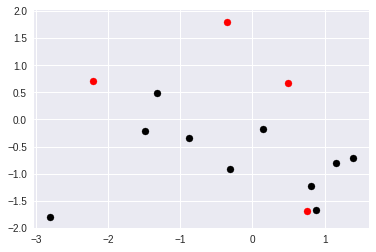

In [15]:
# Genera datos aleatorios en 2D: 10 puntos, 4 centros
X = numpy.random.randn(10,2)
C = numpy.random.randn(4,2)
plt.scatter(X[:,0], X[:,1], color='black');
plt.scatter(C[:,0], C[:,1], color='red');

In [0]:
# Calcula distancias cuadradas de todos los datos de X a cada dato de C
def distancia_cuadrada(X,C):
  """Calcula cuadrados de las distancias de cada punto en X a cada punto en C."""
  # Obtiene dimensiones de las matrices
  (Xr, Xc) = X.shape
  (Cr, Cc) = C.shape
  # Calcula distancias cuadradas
  d2 = numpy.outer(numpy.sum(numpy.square(X), axis=1), numpy.ones((Cr, 1))) + \
       numpy.outer(numpy.ones((Xr, 1)),numpy.sum(numpy.square(C), axis=1)) - \
       2*numpy.dot(X, C.transpose())
  # Evita distancias cuadradas negeativas por redondeo
  d2[d2 < 0] = 0
  return d2

def encuentra_vecino_mas_cercano(X, C):
  """Encuentra entre los puntos de C el más cercano a cada punto de X."""
  # Calcula distancias cuadradas
  d2 = distancia_cuadrada(X, C)
  # Encuentra los vecinos mas cercanos
  nn = numpy.argsort(d2, axis=1)  
  return nn[:,0]

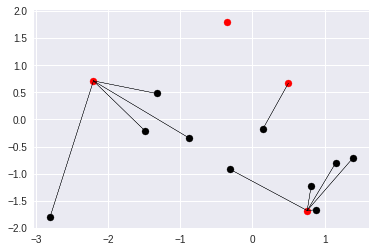

In [17]:
# Encuentra vecinos de X en C
nn = encuentra_vecino_mas_cercano(X,C)
# Grafica datos y muestra parejas de vecinos
plt.scatter(X[:,0], X[:,1], color='black');
plt.scatter(C[:,0], C[:,1], color='red');
for i in range(X.shape[0]):
  plt.arrow(X[i,0],X[i,1],C[nn[i],0]-X[i,0],C[nn[i],1]-X[i,1]);


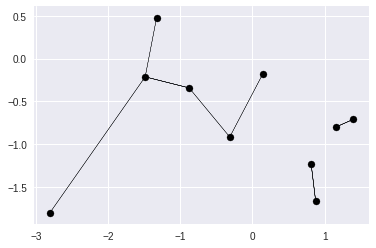

In [23]:
# Encuentra las distancias cuadradas de todos los datos de X contra todos ellos
dX = distancia_cuadrada(X,X)
# Encuentra el vecino más cercano de cada punto de entre los puntos de X
# Ojo: no puede usarse nuestra función porque cada dasto es el más cercano a si mismo
inx = numpy.argsort(dX, axis=1)[:,1]
# Grafica datos y conecta los vecinos mas cercanos
plt.scatter(X[:,0], X[:,1], color='black');
for i in range(X.shape[0]):
  plt.arrow(X[i,0],X[i,1],X[inx[i],0]-X[i,0],X[inx[i],1]-X[i,1]);